### Analysis on the occupations of the speakers

Import useful libraries

In [168]:
%matplotlib inline
import numpy as np
import pandas as pd 
import scipy as sp
import sklearn as sk # data mining tools
import matplotlib.pylab as plt # plotting
import seaborn as sns # advanced plotting
import re
import six

Import the dataset ad ted

In [169]:
ted = pd.read_csv('TED/ted_main.csv')

Show first lines of the dataset

In [170]:
ted.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


Let's see the dimension of the dataset:

In [171]:
len(ted)

2550

Let's create a new dataframe containing the occupations and their count.

In [172]:
occupation_df = ted.groupby('speaker_occupation').count().reset_index()[['speaker_occupation','main_speaker']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)

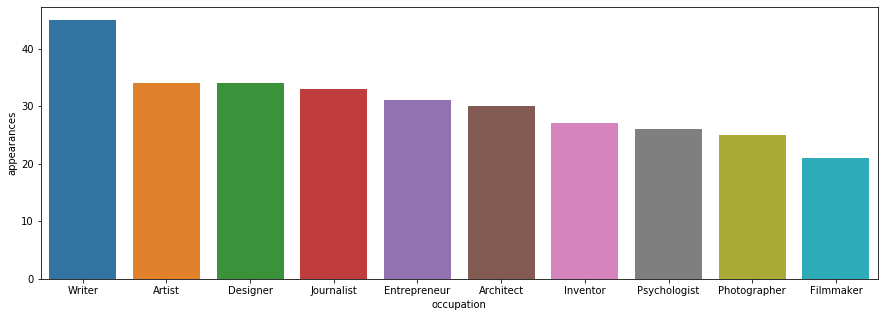

In [173]:
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_df.head(10))
plt.show()

In [174]:
print('\n Sum of appearances:', sum(occupation_df['appearances']))
occupation_df.head(10)


 Sum of appearances: 2544


,occupation,appearances
1426,Writer,45
83,Artist,34
413,Designer,34
753,Journalist,33
515,Entrepreneur,31
71,Architect,30
733,Inventor,27
1131,Psychologist,26
1011,Photographer,25
567,Filmmaker,21


The sum of the appearances indicates that there are some missing values. <br>
Cheching the least appearances, we note that various speakers define themselves with multiple occupations. 

In [175]:
zipf= occupation_df.groupby('appearances').count().reset_index()
zipf.columns = ['appearances', 'repetition']
zipf = zipf.sort_values('repetition', ascending=False)
print(zipf)

    appearances  repetition
0             1        1125
1             2         185
2             3          57
3             4          23
4             5          19
5             6          11
8             9           8
7             8           5
14           20           4
9            10           3
10           11           2
22           34           2
13           16           2
6             7           2
18           27           1
21           33           1
20           31           1
19           30           1
12           15           1
17           26           1
16           25           1
15           21           1
11           14           1
23           45           1


There are a lot of unique occupations, while just a few repeat.

Let's split the occupations in different rows, mantaining the original ID

In [176]:
ted = pd.read_csv('TED/ted_main.csv')
jobs=[]
newID=[]
lista=ted['speaker_occupation']
i=1

for e in lista:
    if isinstance(e, six.string_types):
        n = len(re.findall('; |, |/| and | + ', e))
        for j in range (-1,n):
            newID+=[i]
        jobs+=re.split('; |, |/| and | + ',e.lower())
        i+=1

zippedList =  list(zip(newID,jobs))
splitted_df=pd.DataFrame(zippedList, columns =['id','occupation'])
splitted_df.head(10)
#print(len(splitted_df))

,id,occupation
0,1,author
1,1,educator
2,2,climate advocate
3,3,technology columnist
4,4,activist for environmental justice
5,5,global health expert
6,5,data visionary
7,6,life coach
8,6,expert in leadership psychology
9,7,actor


,occupation,appearances
1296,writer,90
94,author,82
14,activist,63
76,artist,63
430,entrepreneur,57
345,designer,57
658,journalist,50
646,inventor,49
411,educator,47
67,architect,36


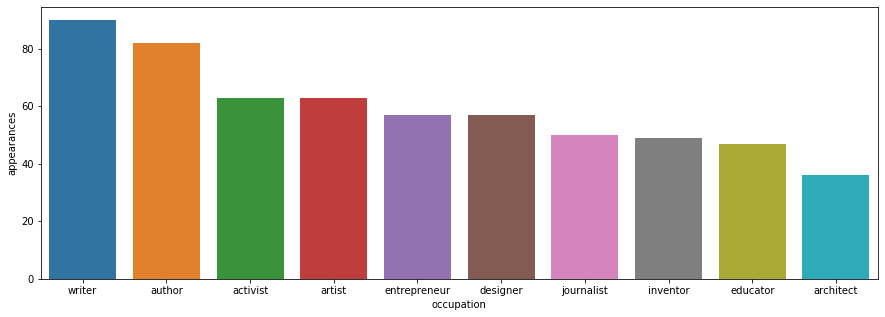

In [177]:
occupation_df2 = splitted_df.groupby(['occupation']).count().reset_index()
occupation_df2.columns = ['occupation', 'appearances']
occupation_df2 = occupation_df2.sort_values('appearances', ascending=False)
display(occupation_df2.head(10))
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_df2.head(10))
plt.show()

Splitting the speaker's occupations, the results are different and more precise.

In [178]:
zipf2= occupation_df2.groupby('appearances').count().reset_index()
zipf2.columns = ['appearances', 'repetition']
zipf2 = zipf2.sort_values('repetition', ascending=False)
print(zipf2)

    appearances  repetition
0             1         949
1             2         171
2             3          52
4             5          25
3             4          23
5             6          18
7             8          10
6             7           6
9            10           6
10           11           6
11           12           5
8             9           4
25           31           3
17           19           3
32           63           2
31           57           2
22           25           2
15           16           2
14           15           1
26           34           1
33           82           1
30           50           1
29           49           1
28           47           1
27           36           1
24           29           1
12           13           1
23           28           1
21           24           1
20           23           1
19           22           1
18           21           1
13           14           1
16           18           1
34           90     

The number of unique occupations has decreased, and the number of the repetition increased.